In [62]:
from nlp import plot_vectors
import matplotlib.pyplot as plt
import numpy as np

### Basic Hash table

In [74]:
def basic_hash_table(values, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i : [] for i in range(n_buckets)}
    
    for value in values:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)
        
    return hash_table

In [76]:
value_l = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_l, 10)
hash_table_example

{0: [100, 10],
 1: [],
 2: [],
 3: [],
 4: [14],
 5: [],
 6: [],
 7: [17, 97],
 8: [],
 9: []}

### Planes

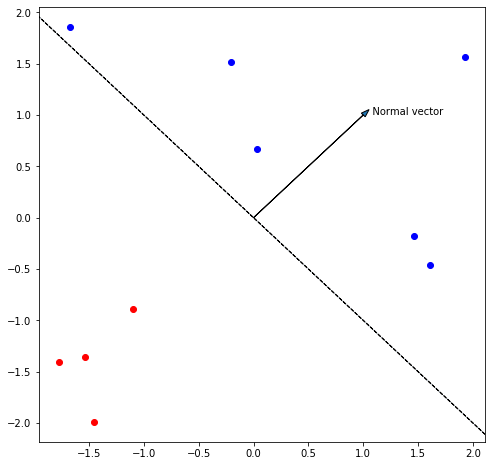

In [103]:
plane_normal_vector = np.array([1, 1])
fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.arrow(0,0,plane_normal_vector[0],plane_normal_vector[1],head_width=0.05)
ax1.annotate("   Normal vector",(plane_normal_vector[0],plane_normal_vector[1]))

plane = np.dot([[0, 1], [-1, 0]], plane_normal_vector.T).T

ax1.arrow(0,0,plane[0]*5,plane[1]*5,linestyle="--")
ax1.arrow(0,0,-plane[0]*5,-plane[1]*5,linestyle="--")

for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2))
        side_of_plane = np.sign(np.dot(plane_normal_vector, v1.T)) 
        
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo')
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro')

plt.show()

In [119]:
def side_of_plane(v,normal_vector):
    dot = np.dot(v,normal_vector.T)
    sign = np.sign(dot)
    if sign == 1:
        return 1
    else:
        return 0

In [108]:
side_of_plane(np.array([-1,-1]),plane_normal_vector)

0

In [109]:
side_of_plane(np.array([1,1]),plane_normal_vector)

1

### Random planes

In [143]:
np.random.seed(0)
random_planes_normal_vectors_matrix = np.random.randn(3,2)
print(random_planes_normal_vectors_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [139]:
v = np.array([[2, 2]])

In [140]:
def side_of_planes(v,normal_vectors):
    dot_products = np.dot(v,normal_vectors.T)
    signs = np.sign(dot_products)
    return signs

In [141]:
side_of_planes(v,random_planes_normal_vectors_matrix)

array([[-1., -1.,  1.]])

In [159]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_planes(P, v)
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
        
    return hash_value

In [161]:
hash_multi_plane_matrix(random_planes_normal_vectors_matrix, v, 3)

7